<a href="https://colab.research.google.com/github/kalai2315/kalai2315/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock Price Prediction Project using TensorFlow**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("/content/BHARTIARTL (1).csv",parse_dates=True,index_col='Date')

In [4]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2002-02-18,BHARTI,EQ,0.00,51.90,51.90,43.50,44.70,44.35,46.00,10381190,4.775431e+13,NaN,6503775.0,0.6265
2002-02-19,BHARTI,EQ,44.35,45.15,45.15,41.30,41.35,41.70,42.58,3552660,1.512609e+13,NaN,1741184.0,0.4901
2002-02-20,BHARTI,EQ,41.70,40.60,42.80,40.25,41.20,41.25,41.56,2512964,1.044348e+13,NaN,NaN,NaN
2002-02-21,BHARTI,EQ,41.25,42.85,43.40,42.15,42.20,42.40,42.76,1338196,5.722681e+12,NaN,485969.0,0.3632
2002-02-22,BHARTI,EQ,42.40,42.65,43.60,41.10,43.35,43.30,42.75,811327,3.468413e+12,NaN,399133.0,0.4920


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4774 entries, 2002-02-18 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              4774 non-null   object 
 1   Series              4774 non-null   object 
 2   Prev Close          4774 non-null   float64
 3   Open                4774 non-null   float64
 4   High                4774 non-null   float64
 5   Low                 4774 non-null   float64
 6   Last                4774 non-null   float64
 7   Close               4774 non-null   float64
 8   VWAP                4774 non-null   float64
 9   Volume              4774 non-null   int64  
 10  Turnover            4774 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  4758 non-null   float64
 13  %Deliverble         4758 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 559.5+ KB


<Axes: xlabel='Date'>

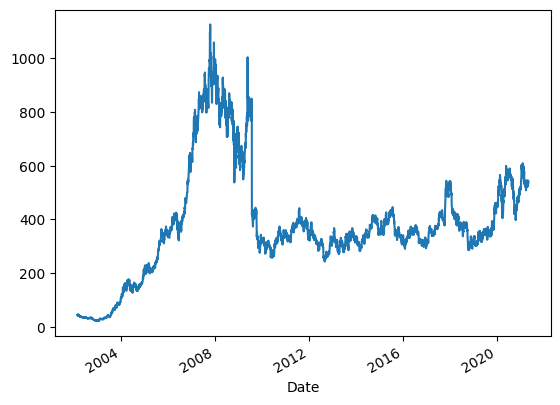

In [9]:
df['Close'].plot()

In [10]:
len(df)

4774

In [12]:
airtel_close=df['Close']
airtel_close.shape

(4774,)

In [15]:
airtel_close.reset_index(drop=True,inplace=True)
airtel_close.shape

(4774, 1)

In [13]:
airtel_close=pd.DataFrame(airtel_close)

In [14]:
airtel_close

,Close
Date,
2002-02-18,44.35
2002-02-19,41.70
2002-02-20,41.25
2002-02-21,42.40
2002-02-22,43.30
...,...
2021-04-26,527.55
2021-04-27,534.30
2021-04-28,544.30


In [16]:
train=airtel_close.iloc[:4750]
test=airtel_close.iloc[4751:]

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()

In [19]:
scaler.fit(train)

MinMaxScaler()

In [20]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

creating the model

In [22]:
test.shape

(23, 1)

In [23]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.src.preprocessing.sequence:

class TimeseriesGenerator(keras.src.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (su

In [24]:
length=23
batch_size=32

generator=TimeseriesGenerator(scaled_train,scaled_train,
                              length=length,batch_size=batch_size)

#will create an object with train - length, and last 23 will be predicted and validated

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM, Dropout

In [26]:
n_features=1

In [27]:
model=Sequential()
model.add(SimpleRNN(30,input_shape=(length,n_features)))

model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991 (3.87 KB)
Trainable params: 991 (3.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model.fit_generator(generator,epochs=30,shuffle=False )

Epoch 1/30
149/149 [==============================] - 1s 4ms/step - loss: 4.5263e-04
Epoch 2/30
149/149 [==============================] - 0s 3ms/step - loss: 4.7871e-04
Epoch 3/30
149/149 [==============================] - 1s 4ms/step - loss: 4.5844e-04
Epoch 4/30
149/149 [==============================] - 1s 4ms/step - loss: 5.4834e-04
Epoch 5/30
149/149 [==============================] - 0s 3ms/step - loss: 4.8314e-04
Epoch 6/30
149/149 [==============================] - 1s 4ms/step - loss: 5.2204e-04
Epoch 7/30
149/149 [==============================] - 1s 4ms/step - loss: 4.9639e-04
Epoch 8/30
149/149 [==============================] - 0s 3ms/step - loss: 5.3785e-04
Epoch 9/30
149/149 [==============================] - 1s 3ms/step - loss: 4.5075e-04
Epoch 10/30
149/149 [==============================] - 0s 3ms/step - loss: 4.3485e-04
Epoch 11/30
149/149 [==============================] - 1s 3ms/step - loss: 4.8301e-04
Epoch 12/30
149/149 [==============================] - 0s 3ms/s

In [64]:
losses=pd.DataFrame(model.history.history)

<Axes: >

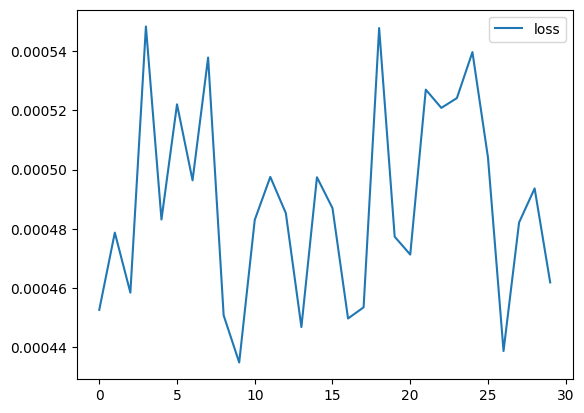

In [65]:
losses.plot()

Evaluate the TestSet


In [66]:
 first_batch=scaled_train[-length:]

In [67]:
first_batch

array([[0.51434519],
       [0.50737623],
       [0.49737533],
       [0.4930763 ],
       [0.49977374],
       [0.5053851 ],
       [0.4847045 ],
       [0.46289257],
       [0.4710381 ],
       [0.47565391],
       [0.46959001],
       [0.46343561],
       [0.45700968],
       [0.4534347 ],
       [0.45714544],
       [0.4556521 ],
       [0.45443027],
       [0.4602679 ],
       [0.45447552],
       [0.45836727],
       [0.46085619],
       [0.45909132],
       [0.46022264]])

In [68]:
first_batch=first_batch.reshape((1,length,1))

In [71]:
first_batch

array([[[0.51434519],
        [0.50737623],
        [0.49737533],
        [0.4930763 ],
        [0.49977374],
        [0.5053851 ],
        [0.4847045 ],
        [0.46289257],
        [0.4710381 ],
        [0.47565391],
        [0.46959001],
        [0.46343561],
        [0.45700968],
        [0.4534347 ],
        [0.45714544],
        [0.4556521 ],
        [0.45443027],
        [0.4602679 ],
        [0.45447552],
        [0.45836727],
        [0.46085619],
        [0.45909132],
        [0.46022264]]])

In [72]:
model.predict(first_batch)

1/1 [==============================] - 0s 15ms/step


array([[0.4598553]], dtype=float32)

In [73]:
test_predictions=[]
first_batch=scaled_train[-length:]
cur_batch=first_batch.reshape((1,length,n_features))
for i in range(len(test)):
  cur_pred=model.predict(cur_batch)[0]
  test_predictions.append(cur_pred)
  cur_batch=np.append(cur_batch[:,1:,:],[[cur_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


In [74]:
test_predictions

[array([0.4598553], dtype=float32),
 array([0.45854044], dtype=float32),
 array([0.45675197], dtype=float32),
 array([0.4562927], dtype=float32),
 array([0.45625395], dtype=float32),
 array([0.45574468], dtype=float32),
 array([0.45469517], dtype=float32),
 array([0.45371816], dtype=float32),
 array([0.45325315], dtype=float32),
 array([0.45256144], dtype=float32),
 array([0.4519748], dtype=float32),
 array([0.45115036], dtype=float32),
 array([0.4502294], dtype=float32),
 array([0.4493732], dtype=float32),
 array([0.44836724], dtype=float32),
 array([0.4474169], dtype=float32),
 array([0.446485], dtype=float32),
 array([0.44556653], dtype=float32),
 array([0.44465756], dtype=float32),
 array([0.44375423], dtype=float32),
 array([0.4428775], dtype=float32),
 array([0.44207227], dtype=float32),
 array([0.441334], dtype=float32)]

In [76]:
true_predictions=scaler.inverse_transform(test_predictions)

In [77]:
true_predictions

array([[528.84410801],
       [527.39133172],
       [525.41525435],
       [524.90779191],
       [524.86498474],
       [524.30230107],
       [523.14268798],
       [522.06319015],
       [521.54940542],
       [520.78513294],
       [520.13696665],
       [519.22603025],
       [518.20847108],
       [517.26243281],
       [516.15096132],
       [515.10093457],
       [514.07129061],
       [513.05646452],
       [512.05214264],
       [511.05404427],
       [510.08535113],
       [509.19565367],
       [508.37994673]])

In [78]:
test['predictions']=true_predictions

In [79]:
test

,Close,predictions
4751,507.75,528.844108
4752,522.50,527.391332
4753,521.50,525.415254
4754,517.30,524.907792
4755,520.80,524.864985
4756,528.25,524.302301
4757,532.20,523.142688
4758,541.60,522.063190
4759,543.00,521.549405
4760,545.25,520.785133


<Axes: >

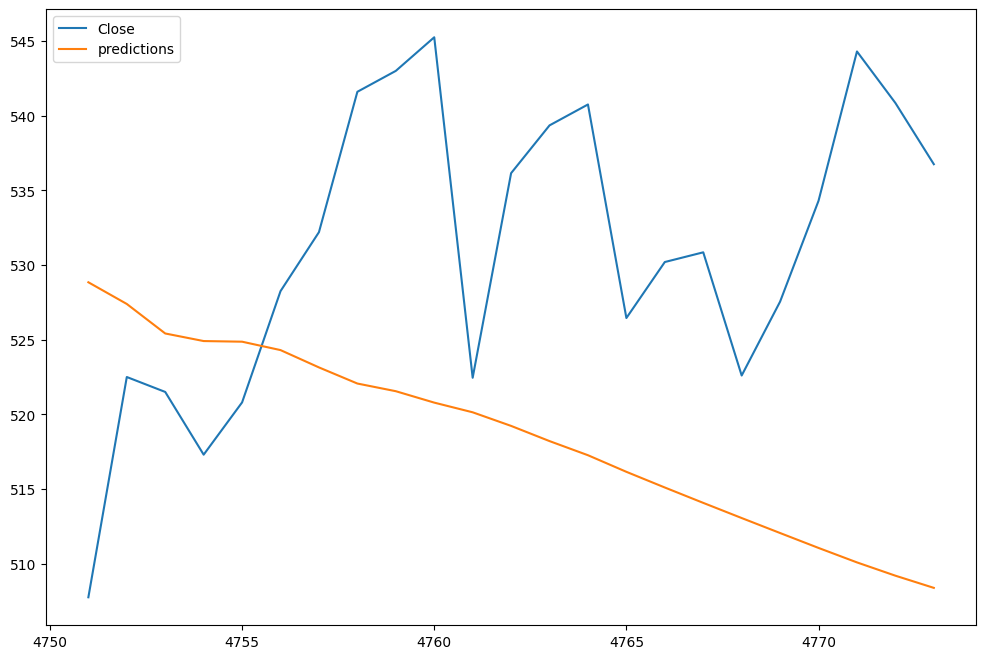

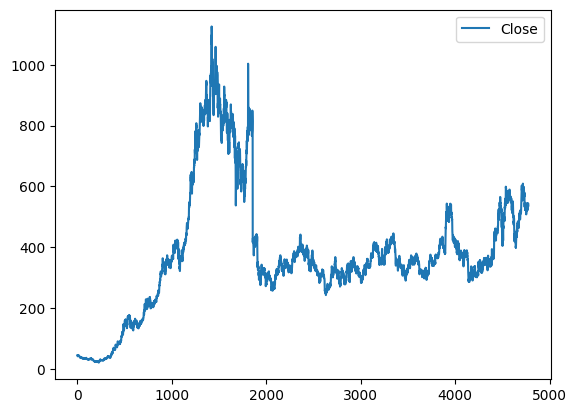

In [80]:
test.plot(figsize=(12,8))
airtel_close.plot()

Create for Full Model

In [81]:
full_scaler=MinMaxScaler()
scaled_full_data=full_scaler.fit_transform(airtel_close)

In [82]:
generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,
                              length=length,batch_size=32)

In [83]:
model=Sequential()
model.add(SimpleRNN(30,input_shape=(length,n_features)))

model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [84]:
model.fit_generator(generator,epochs=30,shuffle=False )

Epoch 1/30
149/149 [==============================] - 1s 4ms/step - loss: 0.0039
Epoch 2/30
149/149 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 3/30
149/149 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 4/30
149/149 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 5/30
149/149 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 6/30
149/149 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 7/30
149/149 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 8/30
149/149 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 9/30
149/149 [==============================] - 1s 4ms/step - loss: 0.0012
Epoch 10/30
149/149 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 11/30
149/149 [==============================] - 0s 3ms/step - loss: 9.7547e-04
Epoch 12/30
149/149 [==============================] - 1s 3ms/step - loss: 8.5536e-04
Epoch 13/30
149/1

In [85]:
full_model_losses=pd.DataFrame(model.history.history)

<Axes: >

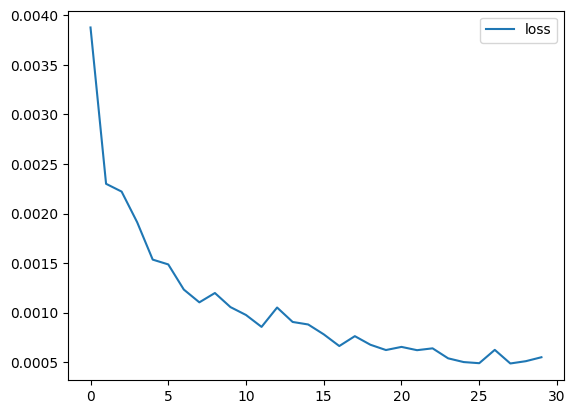

In [86]:
full_model_losses.plot()

In [87]:
fore_cast=[]
first_batch=scaled_train[-length:]
cur_batch=first_batch.reshape((1,length,n_features))
for i in range(len(test)):
  cur_pred=model.predict(cur_batch)[0]
  fore_cast.append(cur_pred)
  cur_batch=np.append(cur_batch[:,1:,:],[[cur_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


In [89]:
fore_cast=scaler.inverse_transform(fore_cast)
fore_cast

array([[530.96181123],
       [529.83061551],
       [529.41574826],
       [530.283186  ],
       [530.75064021],
       [530.18298431],
       [529.77885178],
       [529.25808619],
       [528.61838255],
       [527.96033769],
       [527.39666615],
       [526.48770546],
       [526.27248423],
       [525.1938096 ],
       [524.72421504],
       [524.39937454],
       [523.4736532 ],
       [523.0475573 ],
       [522.69492507],
       [522.02035006],
       [521.58022658],
       [521.22927371],
       [520.83880653]])

In [90]:
fore_cast.flatten()

array([530.96181123, 529.83061551, 529.41574826, 530.283186  ,
       530.75064021, 530.18298431, 529.77885178, 529.25808619,
       528.61838255, 527.96033769, 527.39666615, 526.48770546,
       526.27248423, 525.1938096 , 524.72421504, 524.39937454,
       523.4736532 , 523.0475573 , 522.69492507, 522.02035006,
       521.58022658, 521.22927371, 520.83880653])

In [91]:
df_array=np.array(airtel_close)
df_array

array([[ 44.35],
       [ 41.7 ],
       [ 41.25],
       ...,
       [544.3 ],
       [540.85],
       [536.75]])

In [94]:
full_data=pd.DataFrame(np.concatenate((df_array.flatten(),fore_cast.flatten())))

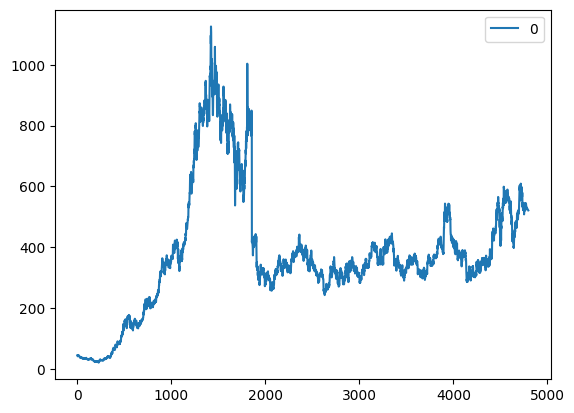

In [95]:
full_data.plot();

LSTM MOdel

In [97]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=5)

In [99]:
length

23

In [101]:
scaled_test.shape

(23, 1)

In [103]:
length=22
generator=TimeseriesGenerator(scaled_train,scaled_train,
                              length=length,batch_size=32)

validation_generator=TimeseriesGenerator(scaled_test,scaled_test,
                              length=length,batch_size=32)

In [ ]:
model=Sequential()
model.add(LSTM(30,input_shape=(length,n_features)))

model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [104]:
model.fit_generator(generator,epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop],shuffle=False )

Epoch 1/30
148/148 [==============================] - 1s 5ms/step - loss: 5.7325e-04 - val_loss: 1.5783e-04
Epoch 2/30
148/148 [==============================] - 1s 3ms/step - loss: 5.2307e-04 - val_loss: 1.1904e-06
Epoch 3/30
148/148 [==============================] - 1s 3ms/step - loss: 6.0382e-04 - val_loss: 2.2817e-04
Epoch 4/30
148/148 [==============================] - 1s 3ms/step - loss: 4.7502e-04 - val_loss: 1.9903e-05


In [105]:
losses=pd.DataFrame(model.history.history)

<Axes: >

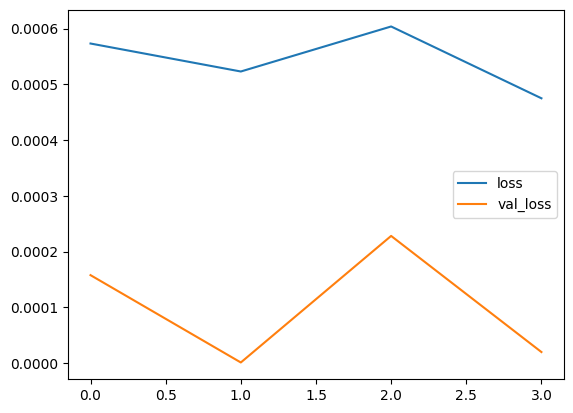

In [106]:
losses.plot()

In [107]:
test_predictions=[]
first_batch=scaled_train[-length:]
cur_batch=first_batch.reshape((1,length,n_features))
for i in range(len(test)):
  #get prediction 1 time stam ahead([0] is for grabing just the number instead of array)
  cur_pred=model.predict(cur_batch)[0]
  test_predictions.append(cur_pred)
  #update batch to now include prediction and drop first value
  cur_batch=np.append(cur_batch[:,1:,:],[[cur_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


<Axes: >

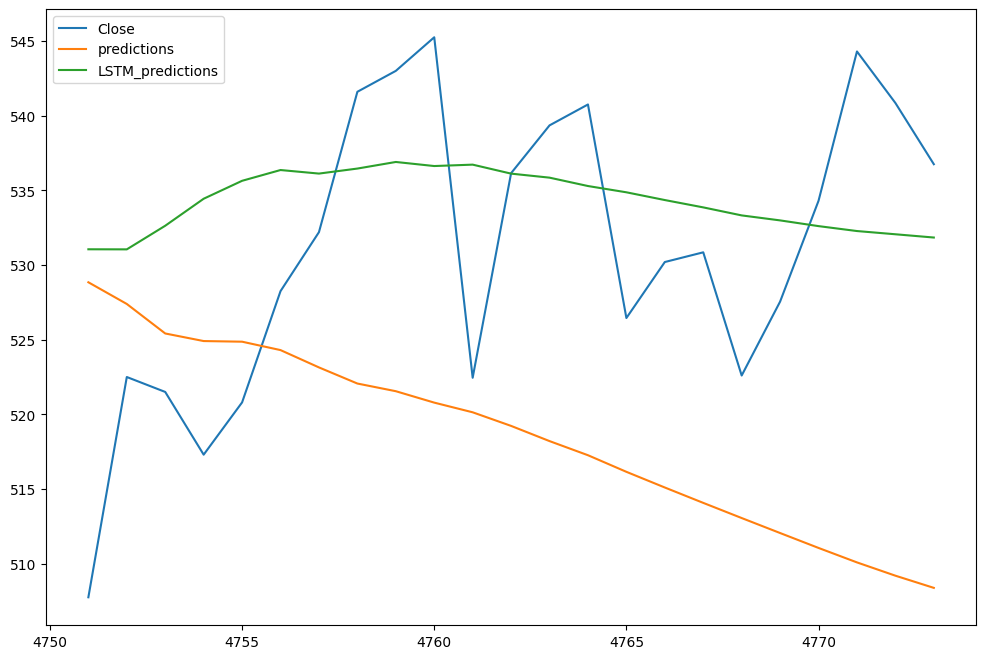

In [112]:
true_predictions=scaler.inverse_transform(test_predictions)
test['LSTM_predictions']=true_predictions
test.plot(figsize=(12,8))

In [113]:
fore_cast=[]
first_batch=scaled_train[-length:]
cur_batch=first_batch.reshape((1,length,n_features))
for i in range(22):
  #get prediction 1 time stam ahead([0] is for grabing just the number instead of array)
  cur_pred=model.predict(cur_batch)[0]
  fore_cast.append(cur_pred)
  #update batch to now include prediction and drop first value
  cur_batch=np.append(cur_batch[:,1:,:],[[cur_pred]],axis=1)

1/1 [==============================] - 0s 16ms/step


In [115]:
fore_cast=scaler.inverse_transform(fore_cast)


In [116]:
full_data=pd.DataFrame(np.concatenate((df_array.flatten(),fore_cast.flatten())))

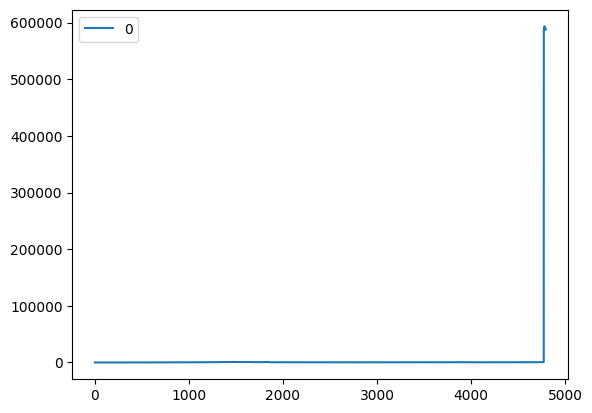

In [118]:
full_data.plot();

In [ ]:
fore_cast

In [ ]:
full_data.tail(30)

FB prophet

In [ ]:
df.reset_index(inplace=True)

In [ ]:
data=df[['Date','close']]

In [ ]:
data.head()

In [ ]:
data=data.rename(columns={"Date":"ds","close":"y"})

In [ ]:
data.head()

In [ ]:
from fbprophet import Prophet
m=Prophet(changepoint_prior_scale=0.15,daily_seasonality=True) #the prophet cl;ass model
m.fit(data)

In [ ]:
future=m.make_future_dataframe(periods=21)#specify the number of days in future
prediction=m.predict(future)
m.plot(prediction)
plt.title("Prediction of google stock price using the prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [ ]:
m.plot_components(prediction)
plt.show()